In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as tts

In [3]:
df = pd.read_csv("healthdataset.csv")
df

,Name,Severity,Number_of_Visits,Disease_Name,Previous_Visits,Time_of_Stay
0,Isha Gupta,1.00,14,Hypertension,13,2
1,Vivaan Mehta,0.97,6,Migraine,3,15
2,Diya Kapoor,1.00,9,Migraine,4,4
3,Saanvi Gupta,0.15,1,ND,0,26
4,Isha Verma,1.00,15,Hypertension,12,6
...,...,...,...,...,...,...
9995,Arjun Mehta,0.86,7,Flu,2,4
9996,Isha Sharma,1.00,10,Hypertension,10,16
9997,Vivaan Kumar,0.95,6,Asthma,5,19
9998,Vivaan Reddy,1.00,8,Flu,6,7


In [22]:
a=df['Time_of_Stay'].mean()
a

np.float64(15.4941)

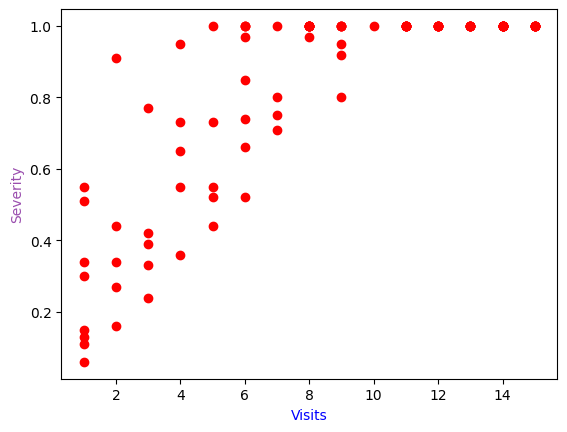

In [4]:
y = df["Severity"].iloc[0:100]
x = df["Number_of_Visits"].head(100)
plt.xlabel("Visits",color="blue")
plt.ylabel("Severity",color="#9A4EAE")
plt.scatter(x,y,color="red")

We can conclude the following observations
*   The bracket of people from severity 0.6 to 0.8 had an average visits of 4-7times
*   The bracket of people from intensity 1 had no fixed or pattern like viits can be due to reasons like changing hospitals , early diagonosis etc
*   Whereas as intensity bracket of people from 0.2 to 0.6 had average visits of 1-4 times
*   We can conclude that the intensities depend somewhat on no. of visits




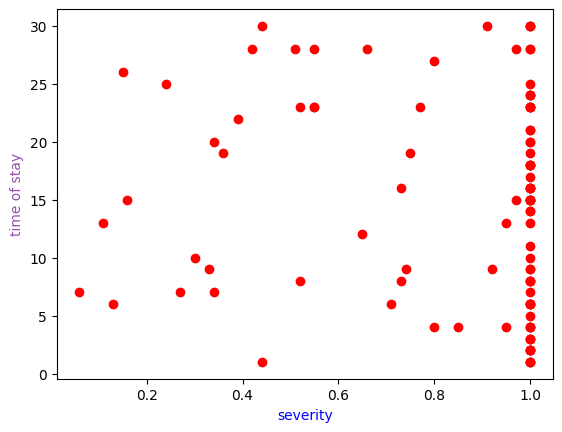

In [5]:
y = df["Time_of_Stay"].iloc[0:100]
x = df["Severity"].head(100)
plt.xlabel("severity",color="blue")
plt.ylabel("time of stay",color="#9A4EAE")
plt.scatter(x,y,color="red")



*   Using the graph above we can say from severities 0 to 0.9 as the severity grows , the time stay grows too
*   However time of stay is uneven which concludes that diseases like migraines require less bed time as patients are given vaccines due to which beds at intensity 1 prediction is difficult



In [15]:
x = df[["Severity","Previous_Visits"]]
y = df["Time_of_Stay"]

x_train, x_test, y_train, y_test = tts(x,y,test_size=0.2)
model = lr()
model.fit(x_train,y_train)


y_test_pred = model.predict(x_test)


In [21]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 75.36


In [19]:
#Now for the exact part

# Get input from user
sev = float(input("Enter Severity (0-1): "))
visits = float(input("Enter number of Previous Visits: "))

# Reshape into the 2D format the model expects
user_input = [[sev, visits]]

result = model.predict(user_input)
print(f"The estimated Time of Stay is: {result[0]:.2f} days")

Enter Severity (0-1): 0.5
Enter number of Previous Visits: 14
The estimated Time of Stay is: 15.21 days


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
